## Actividad 4 - Pregunta 1

A continuación, se presenta la solución de la pregunta 1 de la actividad 4 ña cual dice:
Utilizando la herramienta Jupyter Notebook y el lenguaje de programación Python, realiza la siguiente actividad:

Considera la función: $f(x,y) = 3x^2 + 2xy + 15x + 6y^2 - y$, comenzando desde el punto inicial $(x, y) = (-2, 3)$, encuentra el mínimo valor estimado para el cual esta función converge.

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
from matplotlib.gridspec import GridSpec
from sympy import *

Se declara la variable con la expresión de la función y los símbolos a utilizar

In [70]:
x, y = symbols('x y')
funcion = 3*x**2 + 2*x*y + 15*x + 6*y**2 -y
print("La función es:\n")
funcion

La función es:



3*x**2 + 2*x*y + 15*x + 6*y**2 - y

Se usa lambdify para transformar esta expresión en una función de Python con sympy

In [71]:
funcion_python = lambdify((x, y), funcion)

Se representará la función en un gráfico usando como apoyo la librería matplotlib y el ejercicio visto en clase así como se tomará de apoyo la función que implementa el algoritmo del gradiente descendiente.
Primero se genera un conjunto de datos usando la función de Python

In [72]:
# Se genera un conjunto de datos para la función
l = 4
n = 150
linspace = np.linspace(-l, l, n)
X, Y = np.meshgrid(linspace, linspace)
Z = funcion_python(X, Y)

Se grafican los datos

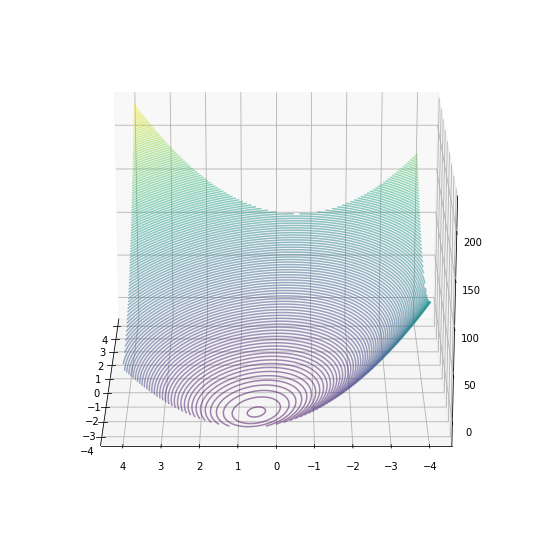

In [73]:
figure = plt.figure(figsize=(15, 16), tight_layout=True)
grids = GridSpec(2, 2)
ax = figure.add_subplot(grids[1, 0], projection='3d')
ax.contour3D(X, Y, Z, n, alpha=0.5)
ax.view_init(elev=20, azim=180)

In [74]:
funciondx = funcion.diff(x)
funciondx_lambda = lambdify('x, y', funciondx)
funciondy = funcion.diff(y)
funciondy_lambda = lambdify('x, y', funciondy)
func_grad_array = [funciondx, funciondy]
func_grad_lambda = lambdify('x, y', func_grad_array)

Se implementa la función del gradiente descendiente

In [75]:
def gradientDescent(gradiente, punto_inicio, tamaño_paso = .08, precision = .01, max_iter = 3000, initError = 10):
    # configuracion inicial
    x,y = punto_inicio.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])

    # inicio de las iteraciones

    while npl.norm(error) > precision and currIter<max_iter:
        currIter+=1 # se incrementa el contador
        prevX = currX.copy() # registra el ultimo valor de error

        # Gradient descent equation
        currX -= tamaño_paso * np.array(gradiente(x,y)) # New X = (last) minus (step size * function gradient(last)).
        x,y = currX[0].copy(), currX[1].copy() # Update X.
        # Gradient descent equation

        error = currX - prevX # Error based on how much movement new X made based on gamma and gradient.
        iterCoords.append(np.hstack([x,y])) # Track X for plotting.

    return currIter, currX, np.vstack(iterCoords)

Se define el punto inicial

In [76]:
punto_inicial = np.vstack([-2, 3])

Graficando el punto inicial

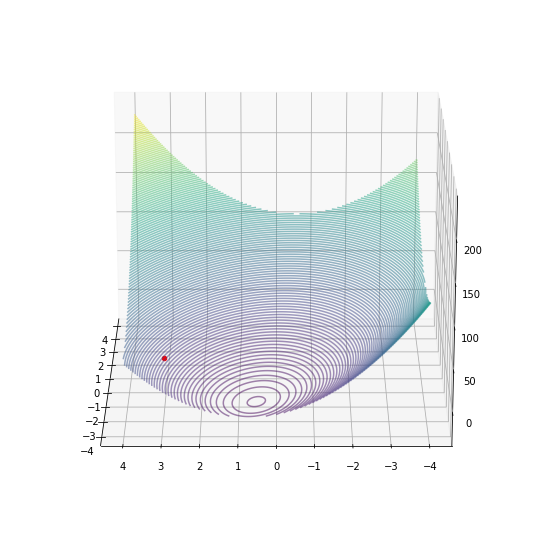

In [77]:
figure = plt.figure(figsize=(15, 16), tight_layout=True)
grids = GridSpec(2, 2)
ax = figure.add_subplot(grids[1, 0], projection='3d')
ax.contour3D(X, Y, Z, n, alpha=0.5)
ax.scatter(punto_inicial[0], punto_inicial[1], funcion_python(*punto_inicial), c='r')
ax.view_init(elev=20, azim=180)

Usando la función de gradiente descendiente se hace el calculo del mínimo donde la función converge

In [78]:
total_pasos, coord_min, iterCoords = gradientDescent(func_grad_lambda, punto_inicial, tamaño_paso = 0.02)
print("Los pasos totales fueron:\n",total_pasos)
print("La coordenada del mínimo son:\n", coord_min)
print("Las coordenadas de los pasos son:\n",iterCoords)

Los pasos totales fueron:
 16
La coordenada del mínimo son:
 [[-2.67991269]
 [ 0.55608604]]
Las coordenadas de los pasos son:
 [[-2.          3.        ]
 [-2.18        2.38      ]
 [-2.3136      1.916     ]
 [-2.412608    1.568704  ]
 [-2.4858432   1.30871936]
 [-2.53989079  1.11406044]
 [-2.57966631  0.96828157]
 [-2.60883762  0.85908064]
 [-2.63014033  0.77725479]
 [-2.64561368  0.71591926]
 [-2.65677681  0.66992318]
 [-2.66476052  0.63541269]
 [-2.67040577  0.60950407]
 [-2.67433724  0.59003932]
 [-2.67701834  0.57540337]
 [-2.67879227  0.5643873 ]
 [-2.67991269  0.55608604]]
